<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#6-支持向量机" data-toc-modified-id="6-支持向量机-3">6 支持向量机</a></span><ul class="toc-item"><li><span><a href="#6.1-线性可分支持向量机（硬间隔支持向量机）" data-toc-modified-id="6.1-线性可分支持向量机（硬间隔支持向量机）-3.1">6.1 线性可分支持向量机（硬间隔支持向量机）</a></span></li><li><span><a href="#6.2-线性支持向量机（软间隔支持向量机）" data-toc-modified-id="6.2-线性支持向量机（软间隔支持向量机）-3.2">6.2 线性支持向量机（软间隔支持向量机）</a></span></li><li><span><a href="#6.3-非线性支持向量机（核技巧）" data-toc-modified-id="6.3-非线性支持向量机（核技巧）-3.3">6.3 非线性支持向量机（核技巧）</a></span></li><li><span><a href="#6.4-序列最小最优化算法（SMO)" data-toc-modified-id="6.4-序列最小最优化算法（SMO)-3.4">6.4 序列最小最优化算法（SMO)</a></span></li><li><span><a href="#6.5-SVM应用" data-toc-modified-id="6.5-SVM应用-3.5">6.5 SVM应用</a></span></li></ul></li></ul></div>

# 6 支持向量机

## 6.1 线性可分支持向量机（硬间隔支持向量机）

训练数据集
\begin{align*} \\& T = \left\{ \left( \mathbf{x}_{1}, y_{1} \right), \left( \mathbf{x}_{2}, y_{2} \right), \cdots, \left( \mathbf{x}_{N}, y_{N} \right) \right\} \end{align*}   
其中，$\mathbf{x}_{i} \in \mathcal{X} = \mathbb{R}^{n}, y_{i} \in \mathcal{Y} = \left\{ +1, -1 \right\}, i = 1, 2, \cdots, N$，$\mathbf{x}_{i}$为第$i$个特征向量（实例），$y_{i}$为第$\mathbf{x}_{i}$的类标记，当$y_{i}=+1$时，称$\mathbf{x}_{i}$为正例；当$y_{i}= -1$时，称$\mathbf{x}_{i}$为负例，$\left( \mathbf{x}_{i}, y_{i} \right)$称为样本点。

线性可分支持向量机（硬间隔支持向量机）：给定线性可分训练数据集，通过间隔最大化或等价地求解相应地凸二次规划问题学习得到分离超平面为
\begin{align*} \\& \mathbf{w}^{*} \cdot \mathbf{x} + b^{*} = 0 \end{align*}   
以及相应的分类决策函数
\begin{align*} \\& f \left( \mathbf{x} \right) = sign \left( \mathbf{w}^{*} \cdot \mathbf{x} + b^{*} \right)  \end{align*}   
称为线型可分支持向量机。其中，$\mathbf{w}^*$和$b^*$为感知机模型参数，$\mathbf{w}^* \in \mathbb{R}^{n}$叫做权值或权值向量，$b^* \in \mathbb{R}$叫做偏置，$\mathbf{w}^* \cdot \mathbf{x}$表示$\mathbf{w}^*$和$\mathbf{x}$的内积。$sign$是符号函数。

超平面$\left( \mathbf{w}, b \right)$关于样本点$\left( \mathbf{x}_{i}, y_{i} \right)$的函数间隔为
\begin{align*} \\& \hat \gamma_{i} = y_{i} \left( \mathbf{w} \cdot \mathbf{x}_{i} + b \right) \end{align*}  

超平面$\left( \mathbf{w}, b \right)$关于训练集$T$的函数间隔
\begin{align*} \\& \hat \gamma = \min_{i = 1, 2, \cdots, N} \hat \gamma_{i} \end{align*}   
即超平面$\left( \mathbf{w}, b \right)$关于训练集$T$中所有样本点$\left( \mathbf{x}_{i}, y_{i} \right)$的函数间隔的最小值。

超平面$\left( \mathbf{w}, b \right)$关于样本点$\left( \mathbf{x}_{i}, y_{i} \right)$的几何间隔为
 \begin{align*} \\& \gamma_{i} = y_{i} \left( \dfrac{\mathbf{w}\cdot \mathbf{x}_{i} + b}{\| \mathbf{w} \|}  \right) \end{align*}   

超平面$\left( \mathbf{w}, b \right)$关于训练集$T$的几何间隔
\begin{align*} \\& \gamma = \min_{i = 1, 2, \cdots, N} \gamma_{i} \end{align*}   
即超平面$\left( \mathbf{w}, b \right)$关于训练集$T$中所有样本点$\left( \mathbf{x}_{i}, y_{i} \right)$的几何间隔的最小值。

函数间隔和几何间隔的关系
\begin{align*} \\& \gamma_{i} = \dfrac{\hat \gamma_{i}}{\| \mathbf{w} \|} 
\\& \gamma = \dfrac{\hat \gamma}{\| \mathbf{w} \|} \end{align*} 

最大间隔分离超平面等价为求解
\begin{align*} \\& \max_{\mathbf{w},b} \quad \gamma
\\ & s.t. \quad y_{i} \left( \dfrac{\mathbf{w}}{\| \mathbf{w} \|} \cdot \mathbf{x}_{i} + \dfrac{b}{\| \mathbf{w} \|} \right) \geq \gamma, \quad i=1,2, \cdots, N \end{align*}  
等价的
\begin{align*}  \\ & \max_{\mathbf{w},b} \quad \dfrac{\hat \gamma}{\| \mathbf{w} \|}
\\ & s.t. \quad y_{i} \left( \mathbf{w} \cdot \mathbf{x}_{i} + b \right) \geq \hat \gamma, \quad i=1,2, \cdots, N \end{align*}   
等价的
\begin{align*}  \\ & \max_{\mathbf{w},b} \quad \dfrac{1}{\| \mathbf{w} \|}
\\ & s.t. \quad y_{i} \left( \mathbf{w} \cdot \mathbf{x}_{i} + b \right) \geq 1, \quad i=1,2, \cdots, N \end{align*} 
等价的
\begin{align*}  \\ & \min_{\mathbf{w},b} \quad \dfrac{1}{2} \| \mathbf{w} \|^{2}
\\ & s.t. \quad y_{i} \left( \mathbf{w} \cdot \mathbf{x}_{i} + b \right) -1 \geq 0, \quad i=1,2, \cdots, N \end{align*}   

线性可分支持向量机学习算法（最大间隔法）：  
输入：线性可分训练数据集$T = \left\{ \left( \mathbf{x}_{1}, y_{1} \right), \left( \mathbf{x}_{2}, y_{2} \right), \cdots, \left( \mathbf{x}_{N}, y_{N} \right) \right\}$，其中$\mathbf{x}_{i} \in \mathcal{X} = \mathbb{R}^{n}, y_{i} \in \mathcal{Y} = \left\{ +1, -1 \right\}, i = 1, 2, \cdots, N$  
输出：最大间隔分离超平面和分类决策函数  
1. 构建并求解约束最优化问题
\begin{align*}  \\ & \min_{\mathbf{w},b} \quad \dfrac{1}{2} \| \mathbf{w} \|^{2}
\\ & s.t. \quad y_{i} \left( \mathbf{w} \cdot \mathbf{x}_{i} + b \right) -1 \geq 0, \quad i=1,2, \cdots, N \end{align*}   
求得最优解$\mathbf{w}^{*}, b^{*}$。  
2. 得到分离超平面
\begin{align*}  \\ & \mathbf{w}^{*} \cdot \mathbf{x} + b^{*} = 0 \end{align*}   
以及分类决策函数  
\begin{align*} \\& f \left( \mathbf{x} \right) = sign \left( \mathbf{w}^{*} \cdot \mathbf{x} + b^{*} \right)  \end{align*}  

（硬间隔）支持向量：训练数据集的样本点中与分离超平面距离最近的样本点的实例，即使约束条件等号成立的样本点
\begin{align*} \\ & y_{i} \left( \mathbf{w} \cdot \mathbf{x}_{i} + b \right) -1 = 0 \end{align*}    
对$y_{i} = +1$的正例点，支持向量在超平面  
\begin{align*} \\ & H_{1}:\mathbf{w} \cdot \mathbf{x} + b = 1  \end{align*}  
对$y_{i} = -1$的正例点，支持向量在超平面  
\begin{align*} \\ & H_{1}:\mathbf{w} \cdot \mathbf{x} + b = -1  \end{align*}     
$H_{1}$和$H_{2}$称为间隔边界。  
$H_{1}$和$H_{2}$之间的距离称为间隔，且$|H_{1}H_{2}| = \dfrac{1}{\| \mathbf{w} \|} + \dfrac{1}{\| \mathbf{w} \|} = \dfrac{2}{\| \mathbf{w} \|}$。

最优化问题的求解：  
1. 引入拉格朗日乘子$\alpha_{i} \geq 0, i = 1, 2, \cdots, N$构建拉格朗日函数
\begin{align*} \\ L \left( \mathbf{w}, b, \alpha \right) &=  \dfrac{1}{2} \| \mathbf{w} \|^{2} + \sum_{i=1}^{N} \alpha_{i} \left[- y_{i} \left( \mathbf{w} \cdot \mathbf{x}_{i} + b \right) + 1  \right] 
\\ & = \dfrac{1}{2} \| \mathbf{w} \|^{2} - \sum_{i=1}^{N} \alpha_{i}  y_{i} \left( \mathbf{w} \cdot \mathbf{x}_{i} + b \right) + \sum_{i=1}^{N} \alpha_{i}  \end{align*}    
其中，$\alpha = \left( \alpha_{1}, \alpha_{2}, \cdots, \alpha_{N} \right)^\top$为拉格朗日乘子向量。
2. 求$\min_{\mathbf{w},b}L \left( \mathbf{w}, b, \alpha \right)$:  
令
\begin{align*} \\ &  \nabla _{\mathbf{w}} L \left( \mathbf{w}, b, \alpha \right) = \mathbf{w} - \sum_{i=1}^{N} \alpha_{i} y_{i} \mathbf{x}_{i} = 0 
\\ &  \nabla _{b} L \left( \mathbf{w}, b, \alpha \right) = -\sum_{i=1}^{N} \alpha_{i} y_{i} = 0 \end{align*}   
得  
\begin{align*} \\ &   \mathbf{w} ＝ \sum_{i=1}^{N} \alpha_{i} y_{i} \mathbf{x}_{i}  
\\ &  \sum_{i=1}^{N} \alpha_{i} y_{i} = 0 \end{align*}   
代入拉格朗日函数，得
\begin{align*} \\ L \left( \mathbf{w}, b, \alpha \right) &=  \dfrac{1}{2} \sum_{i=1}^{N} \sum_{j=1}^{N} \alpha_{i} \alpha_{j} y_{i} y_{j} \left( \mathbf{x}_{i} \cdot \mathbf{x}_{j} \right) - \sum_{i=1}^{N} \alpha_{i}  y_{i} \left[ \left( \sum_{j=1}^{N} \alpha_{j} y_{j} \mathbf{x}_{j} \right) \cdot \mathbf{x}_{i} + b \right] + \sum_{i=1}^{N} \alpha_{i} 
\\ & = - \dfrac{1}{2} \sum_{i=1}^{N} \sum_{j=1}^{N} \alpha_{i} \alpha_{j} y_{i} y_{j} \left( \mathbf{x}_{i} \cdot \mathbf{x}_{j} \right) - \sum_{i=1}^{N} \alpha_{i} y_{i} b + \sum_{i=1}^{N} \alpha_{i} 
\\ & = - \dfrac{1}{2} \sum_{i=1}^{N} \sum_{j=1}^{N} \alpha_{i} \alpha_{j} y_{i} y_{j} \left( \mathbf{x}_{i} \cdot \mathbf{x}_{j} \right)  + \sum_{i=1}^{N} \alpha_{i} \end{align*}    
即
\begin{align*} \\ & \min_{\mathbf{w},b}L \left( \mathbf{w}, b, \alpha \right) = - \dfrac{1}{2} \sum_{i=1}^{N} \sum_{j=1}^{N} \alpha_{i} \alpha_{j} y_{i} y_{j} \left( \mathbf{x}_{i} \cdot \mathbf{x}_{j} \right)  + \sum_{i=1}^{N} \alpha_{i}    \end{align*} 
3.求$\max_{\alpha} \min_{\mathbf{w},b}L \left( \mathbf{w}, b, \alpha \right)$:
\begin{align*} \\ &  \max_{\alpha} - \dfrac{1}{2} \sum_{i=1}^{N} \sum_{j=1}^{N} \alpha_{i} \alpha_{j} y_{i} y_{j} \left( \mathbf{x}_{i} \cdot \mathbf{x}_{j} \right)  + \sum_{i=1}^{N} \alpha_{i}  
\\ & s.t. \sum_{i=1}^{N} \alpha_{i} y_{i} = 0
\\ & \alpha_{i} \geq 0, \quad i=1,2, \cdots, N  \end{align*}    
等价的
\begin{align*} \\ &  \min_{\alpha} \dfrac{1}{2} \sum_{i=1}^{N} \sum_{j=1}^{N} \alpha_{i} \alpha_{j} y_{i} y_{j} \left( \mathbf{x}_{i} \cdot \mathbf{x}_{j} \right)  - \sum_{i=1}^{N} \alpha_{i}  
\\ & s.t. \sum_{i=1}^{N} \alpha_{i} y_{i} = 0
\\ & \alpha_{i} \geq 0, \quad i=1,2, \cdots, N  \end{align*} 

线性可分支持向量机（硬间隔支持向量机）学习算法：  
输入：线性可分训练数据集$T = \left\{ \left( \mathbf{x}_{1}, y_{1} \right), \left( \mathbf{x}_{2}, y_{2} \right), \cdots, \left( \mathbf{x}_{N}, y_{N} \right) \right\}$，其中$\mathbf{x}_{i} \in \mathcal{X} = \mathbb{R}^{n}, y_{i} \in \mathcal{Y} = \left\{ +1, -1 \right\}, i = 1, 2, \cdots, N$  
输出：最大间隔分离超平面和分类决策函数  
1. 构建并求解约束最优化问题
\begin{align*} \\ &  \min_{\alpha} \dfrac{1}{2} \sum_{i=1}^{N} \sum_{j=1}^{N} \alpha_{i} \alpha_{j} y_{i} y_{j} \left( \mathbf{x}_{i} \cdot \mathbf{x}_{j} \right)  - \sum_{i=1}^{N} \alpha_{i}  
\\ & s.t. \sum_{i=1}^{N} \alpha_{i} y_{i} = 0
\\ & \alpha_{i} \geq 0, \quad i=1,2, \cdots, N  \end{align*}    
求得最优解$\alpha^{*} = \left( \alpha_{1}^{*}, \alpha_{1}^{*}, \cdots, \alpha_{N}^{*} \right) $。  
2. 计算
\begin{align*}  \\ & \mathbf{w}^{*} = \sum_{i=1}^{N} \alpha_{i}^{*} y_{i} \mathbf{x}_{i} \end{align*}   
并选择$\alpha^{*}$的一个正分量$\alpha_{j}^{*} > 0$，计算
\begin{align*}  \\ & b^{*} = y_{j} - \sum_{i=1}^{N} \alpha_{i}^{*} y_{i} \left( \mathbf{x}_{i} \cdot \mathbf{x}_{j} \right) \end{align*}  
3. 得到分离超平面
\begin{align*}  \\ & \mathbf{w}^{*} \cdot \mathbf{x} + b^{*} = 0 \end{align*}   
以及分类决策函数  
\begin{align*} \\& f \left( \mathbf{x} \right) = sign \left( \mathbf{w}^{*} \cdot \mathbf{x} + b^{*} \right)  \end{align*}  

## 6.2 线性支持向量机（软间隔支持向量机）

线性支持向量机（软间隔支持向量机）：给定线性不可分训练数据集，通过求解凸二次规划问题  
\begin{align*}  \\ & \min_{\mathbf{w},b,\xi} \quad \dfrac{1}{2} \| \mathbf{w} \|^{2} + C \sum_{i=1}^{N} \xi_{i}
\\ & s.t. \quad y_{i} \left( \mathbf{w} \cdot \mathbf{x}_{i} + b \right) \geq 1 - \xi_{i}
\\ & \xi_{i} \geq 0, \quad i=1,2, \cdots, N \end{align*}  
学习得到分离超平面为
\begin{align*} \\& \mathbf{w}^{*} \cdot \mathbf{x} + b^{*} = 0 \end{align*}   
以及相应的分类决策函数
\begin{align*} \\& f \left( \mathbf{x} \right) = sign \left( \mathbf{w}^{*} \cdot \mathbf{x} + b^{*} \right)  \end{align*}   
称为线型支持向量机。

最优化问题的求解：  
1. 引入拉格朗日乘子$\alpha_{i} \geq 0, \mu_{i} \geq 0, i = 1, 2, \cdots, N$构建拉格朗日函数
\begin{align*} \\ L \left( \mathbf{w}, b, \xi, \alpha, \mu \right) &=  \dfrac{1}{2} \| \mathbf{w} \|^{2} + C \sum_{i=1}^{N} \xi_{i} + \sum_{i=1}^{N} \alpha_{i} \left[- y_{i} \left( \mathbf{w} \cdot \mathbf{x}_{i} + b \right) + 1 - \xi_{i}  \right] + \sum_{i=1}^{N} \mu_{i} \left( -\xi_{i} \right)
\\ & = \dfrac{1}{2} \| \mathbf{w} \|^{2} + C \sum_{i=1}^{N} \xi_{i} - \sum_{i=1}^{N} \alpha_{i} \left[ y_{i} \left( \mathbf{w} \cdot \mathbf{x}_{i} + b \right) -1 + \xi_{i} \right] - \sum_{i=1}^{N} \mu_{i} \xi_{i}  \end{align*}    
其中，$\alpha = \left( \alpha_{1}, \alpha_{2}, \cdots, \alpha_{N} \right)^\top $以及$\mu = \left( \mu_{1}, \mu_{2}, \cdots, \mu_{N} \right)^\top$为拉格朗日乘子向量。  
2. 求$\min_{\mathbf{w},b}L \left( \mathbf{w}, b, \xi, \alpha, \mu \right)$:  
令
\begin{align*} \\ &  \nabla_{\mathbf{w}} L \left( \mathbf{w}, b, \xi, \alpha, \mu \right) = \mathbf{w} - \sum_{i=1}^{N} \alpha_{i} y_{i} \mathbf{x}_{i} = 0 
\\ &  \nabla_{b} L \left( \mathbf{w}, b, \xi, \alpha, \mu \right) = -\sum_{i=1}^{N} \alpha_{i} y_{i} = 0 
\\ & \nabla_{\xi_{i}} L \left( \mathbf{w}, b, \xi, \alpha, \mu \right) = C - \alpha_{i} - \mu_{i} = 0 \end{align*}   
得  
\begin{align*} \\ &   \mathbf{w} ＝ \sum_{i=1}^{N} \alpha_{i} y_{i} \mathbf{x}_{i}  
\\ &  \sum_{i=1}^{N} \alpha_{i} y_{i} = 0 
\\ & C - \alpha_{i} - \mu_{i} = 0\end{align*}   
代入拉格朗日函数，得
\begin{align*} \\  L \left( \mathbf{w}, b, \xi, \alpha, \mu \right) &=  \dfrac{1}{2} \sum_{i=1}^{N} \sum_{j=1}^{N} \alpha_{i} \alpha_{j} y_{i} y_{j} \left( \mathbf{x}_{i} \cdot \mathbf{x}_{j} \right) + C \sum_{i=1}^{N} \xi_{i} - \sum_{i=1}^{N} \alpha_{i}  y_{i} \left[ \left( \sum_{j=1}^{N} \alpha_{j} y_{j} x_{j} \right) \cdot \mathbf{x}_{i} + b \right] + \sum_{i=1}^{N} \alpha_{i} - \sum_{i=1}^{N} \alpha_{i} \xi_{i} - \sum_{i}^{N} \mu_{i} \xi_{i}
\\ & = - \dfrac{1}{2} \sum_{i=1}^{N} \sum_{j=1}^{N} \alpha_{i} \alpha_{j} y_{i} y_{j} \left( \mathbf{x}_{i} \cdot \mathbf{x}_{j} \right) - \sum_{i=1}^{N} \alpha_{i} y_{i} b + \sum_{i=1}^{N} \alpha_{i} + \sum_{i=1}^{N} \xi_{i} \left( C - \alpha_{i} - \mu_{i}  \right)
\\ & = - \dfrac{1}{2} \sum_{i=1}^{N} \sum_{j=1}^{N} \alpha_{i} \alpha_{j} y_{i} y_{j} \left( \mathbf{x}_{i} \cdot \mathbf{x}_{j} \right)  + \sum_{i=1}^{N} \alpha_{i} \end{align*}    
即
\begin{align*} \\ & \min_{\mathbf{w},b,\xi}L \left( \mathbf{w}, b, \xi, \alpha, \mu \right) = - \dfrac{1}{2} \sum_{i=1}^{N} \sum_{j=1}^{N} \alpha_{i} \alpha_{j} y_{i} y_{j} \left( \mathbf{x}_{i} \cdot \mathbf{x}_{j} \right)  + \sum_{i=1}^{N} \alpha_{i}    \end{align*}   
3.求$\max_{\alpha} \min_{\mathbf{w},b, \xi}L \left( \mathbf{w}, b, \xi, \alpha, \mu \right)$:
\begin{align*} \\ &  \max_{\alpha} - \dfrac{1}{2} \sum_{i=1}^{N} \sum_{j=1}^{N} \alpha_{i} \alpha_{j} y_{i} y_{j} \left( \mathbf{x}_{i} \cdot \mathbf{x}_{j} \right)  + \sum_{i=1}^{N} \alpha_{i}  
\\ & s.t. \sum_{i=1}^{N} \alpha_{i} y_{i} = 0
\\ & C - \alpha_{i} - \mu_{i} = 0
\\ & \alpha_{i} \geq 0
\\ & \mu_{i} \geq 0, \quad i=1,2, \cdots, N  \end{align*}    
等价的
\begin{align*} \\ &  \min_{\alpha} \dfrac{1}{2} \sum_{i=1}^{N} \sum_{j=1}^{N} \alpha_{i} \alpha_{j} y_{i} y_{j} \left( \mathbf{x}_{i} \cdot \mathbf{x}_{j} \right)  - \sum_{i=1}^{N} \alpha_{i}  
\\ & s.t. \sum_{i=1}^{N} \alpha_{i} y_{i} = 0
\\ & 0 \leq \alpha_{i} \leq C , \quad i=1,2, \cdots, N  \end{align*}    

线性支持向量机（软间隔支持向量机）学习算法：  
输入：训练数据集$T = \left\{ \left( \mathbf{x}_{1}, y_{1} \right), \left( \mathbf{x}_{2}, y_{2} \right), \cdots, \left( \mathbf{x}_{N}, y_{N} \right) \right\}$，其中$\mathbf{x}_{i} \in \mathcal{X} = \mathbb{R}^{n}, y_{i} \in \mathcal{Y} = \left\{ +1, -1 \right\}, i = 1, 2, \cdots, N$  
输出：最大间隔分离超平面和分类决策函数  
1. 选择惩罚参数$C \geq 0$，构建并求解约束最优化问题
\begin{align*} \\ &  \min_{\alpha} \dfrac{1}{2} \sum_{i=1}^{N} \sum_{j=1}^{N} \alpha_{i} \alpha_{j} y_{i} y_{j} \left( \mathbf{x}_{i} \cdot \mathbf{x}_{j} \right)  - \sum_{i=1}^{N} \alpha_{i}  
\\ & s.t. \sum_{i=1}^{N} \alpha_{i} y_{i} = 0
\\ & 0 \leq \alpha_{i} \leq C , \quad i=1,2, \cdots, N  \end{align*}    
求得最优解$\alpha^{*} = \left( \alpha_{1}^{*}, \alpha_{1}^{*}, \cdots, \alpha_{N}^{*} \right) $。  
2. 计算
\begin{align*}  \\ & \mathbf{w}^{*} = \sum_{i=1}^{N} \alpha_{i}^{*} y_{i} \mathbf{x}_{i} \end{align*}   
并选择$\alpha^{*}$的一个分量$0 < \alpha_{j}^{*} < C$，计算
\begin{align*}  \\ & b^{*} = y_{j} - \sum_{i=1}^{N} \alpha_{i}^{*} y_{i} \left( \mathbf{x}_{i} \cdot \mathbf{x}_{j} \right) \end{align*}  
3. 得到分离超平面
\begin{align*}  \\ & \mathbf{w}^{*} \cdot \mathbf{x} + b^{*} = 0 \end{align*}   
以及分类决策函数  
\begin{align*} \\& f \left( \mathbf{x} \right) = sign \left( \mathbf{w}^{*} \cdot \mathbf{x} + b^{*} \right)  \end{align*}  

（软间隔）支持向量：线性不可分情况下，最优化问题的解$\alpha^{*} = \left( \alpha_{1}^{*}, \alpha_{2}^{*}, \cdots, \alpha_{N}^{*} \right)^\top$中对应于$\alpha_{i}^{*} > 0$的样本点$\left( x_{i}, y_{i} \right)$的实例$x_{i}$。  

实例$x_{i}$的几何间隔
\begin{align*} \\& \gamma_{i} = \dfrac{y_{i} \left( w \cdot x_{i} + b \right)}{ \| w \|} = \dfrac{| 1 - \xi_{i} |}{\| w \|} \end{align*}    
且$\dfrac{1}{2} | H_{1}H_{2} | = \dfrac{1}{\| w \|}$  
则实例$x_{i}$到间隔边界的距离
\begin{align*} \dfrac{\xi_{i}}{\| w \|}\end{align*}  
\begin{align*} \xi_{i} \geq 0 \Leftrightarrow \left\{
\begin{aligned} 
\ &  \xi_{i}=0, x_{i}在间隔边界上;
\\ & 0 < \xi_{i} < 1, x_{i}在间隔边界与分离超平面之间;
\\ & \xi_{i}=1, x_{i}在分离超平面上;
\\ & \xi_{i}>1, x_{i}在分离超平面误分类一侧;
\end{aligned}
\right.\end{align*} 

线性支持向量机（软间隔）的合页损失函数
\begin{align*} \\& L \left( y \left( \mathbf{w} \cdot \mathbf{x} + b \right) \right) = \left[ 1 - y \left(\mathbf{w} \cdot \mathbf{x} + b \right) \right]_{+} \end{align*}     
其中，“＋”为取正函数
\begin{align*} \left[ z \right]_{+} = \left\{
\begin{aligned} 
\ &  z, z > 0
\\ & 0, z \leq 0
\end{aligned}
\right.\end{align*} 

## 6.3 非线性支持向量机（核技巧）

核函数  
设$\mathcal{X}$是输入空间（欧氏空间$\mathbb{R}^{n}$的子集或离散集合），$\mathcal{H}$是特征空间（希尔伯特空间），如果存在一个从$\mathcal{X}$到$\mathcal{H}$的映射
\begin{align*} \\& \phi \left( \mathbf{x} \right) : \mathcal{X} \to \mathcal{H}   \end{align*}  
使得对所有$\mathbf{x},\mathbf{z} \in \mathcal{X}$，函数$K \left(\mathbf{x}, \mathbf{z} \right)$满足条件  
\begin{align*} \\ &  K \left(\mathbf{x}, \mathbf{z} \right) = \phi \left( \mathbf{x} \right) \cdot \phi \left( \mathbf{z} \right)  \end{align*}  
则称$K \left(\mathbf{x}, \mathbf{z} \right)$为核函数，$\phi \left( \mathbf{x} \right)$为映射函数，式中$\phi \left( \mathbf{x} \right) \cdot \phi \left( \mathbf{z} \right)$为$\phi \left( \mathbf{x} \right)$和$\phi \left( \mathbf{z} \right)$的内积。  

常用核函数：  
1. 多项式核函数
\begin{align*} \\& K \left( \mathbf{x}, \mathbf{z} \right) = \left( \mathbf{x} \cdot \mathbf{z} + 1 \right)^{p} \end{align*}   
2. 高斯核函数  
\begin{align*} \\& K \left( \mathbf{x}, \mathbf{z} \right) = \exp \left( - \dfrac{\| \mathbf{x} - \mathbf{z} \|^{2}}{2 \sigma^{2}} \right) \end{align*}   

非线性支持向量机：从非线性分类训练集，通过核函数与软间隔最大化，学习得到分类决策函数  
\begin{align*} \\& f \left( \mathbf{x} \right) = sign \left( \sum_{i=1}^{N} \alpha_{i}^{*} y_{i} K \left(\mathbf{x}, \mathbf{x}_{i} \right) + b^{*} \right) \end{align*}  
称为非线性支持向量机，$K \left( \mathbf{x}, \mathbf{z} \right)$是正定核函数。

非线性支持向量机学习算法：  
输入：训练数据集$T = \left\{ \left( \mathbf{x}_{1}, y_{1} \right), \left( \mathbf{x}_{2}, y_{2} \right), \cdots, \left( \mathbf{x}_{N}, y_{N} \right) \right\}$，其中$\mathbf{x}_{i} \in \mathcal{X} = \mathbb{R}^{n}, y_{i} \in \mathcal{Y} = \left\{ +1, -1 \right\}, i = 1, 2, \cdots, N$  
输出：分类决策函数  
1. 选择适当的核函数$K \left( \mathbf{x}, \mathbf{z} \right)$和惩罚参数$C \geq 0$，构建并求解约束最优化问题
\begin{align*} \\ &  \min_{\alpha} \dfrac{1}{2} \sum_{i=1}^{N} \sum_{j=1}^{N} \alpha_{i} \alpha_{j} y_{i} y_{j} K \left( \mathbf{x}_{i}, \mathbf{x}_{j} \right)  - \sum_{i=1}^{N} \alpha_{i}  
\\ & s.t. \sum_{i=1}^{N} \alpha_{i} y_{i} = 0
\\ & 0 \leq \alpha_{i} \leq C , \quad i=1,2, \cdots, N  \end{align*}    
求得最优解$\alpha^{*} = \left( \alpha_{1}^{*}, \alpha_{1}^{*}, \cdots, \alpha_{N}^{*} \right) $。  
2. 计算
\begin{align*}  \\ & \mathbf{w}^{*} = \sum_{i=1}^{N} \alpha_{i}^{*} y_{i} \mathbf{x}_{i} \end{align*}   
并选择$\alpha^{*}$的一个分量$0 < \alpha_{j}^{*} < C$，计算
\begin{align*}  \\ & b^{*} = y_{j} - \sum_{i=1}^{N} \alpha_{i}^{*} y_{i} K \left( \mathbf{x}_{i}, \mathbf{x}_{j} \right) \end{align*}  
3. 得到分离超平面
\begin{align*}  \\ & \mathbf{w}^{*} \cdot \mathbf{x} + b^{*} = 0 \end{align*}   
以及分类决策函数  
\begin{align*} \\& f \left( \mathbf{x} \right) = sign \left( \sum_{i=1}^{N} \alpha_{i}^{*} y_{i} K \left( \mathbf{x}_{i}, \mathbf{x}_{j} \right) + b^{*} \right)  \end{align*}  

## 6.4 序列最小最优化算法（SMO)

序列最小最优化（sequential minimal optimization，SMO）算法  要解如下凸二次规划的对偶问题：  
\begin{align*} \\ &  \min_{\alpha} \dfrac{1}{2} \sum_{i=1}^{N} \sum_{j=1}^{N} \alpha_{i} \alpha_{j} y_{i} y_{j} K \left( \mathbf{x}_{i}, \mathbf{x}_{j} \right)  - \sum_{i=1}^{N} \alpha_{i}  
\\ & s.t. \sum_{i=1}^{N} \alpha_{i} y_{i} = 0
\\ & 0 \leq \alpha_{i} \leq C , \quad i=1,2, \cdots, N  \end{align*}    

选择$\alpha_{1}, \alpha_{2}$两个变量，其他变量$\alpha_{i} \left( i = 3, 4, \cdots, N \right)$是固定的，SMO的最优化问题的子问题  
\begin{align*} \\   \min_{\alpha_{1}, \alpha_{2}} W \left( \alpha_{1}, \alpha_{2} \right) &= \dfrac{1}{2} K_{11} \alpha_{1}^{2} + \dfrac{1}{2} K_{22} \alpha_{2}^{2} + y_{1} y_{2} K_{12} \alpha_{1} \alpha_{2} 
\\ & - \left( \alpha_{1} + \alpha_{2} \right) + y_{1} \alpha_{1} \sum_{i=3}^{N} y_{i} \alpha_{i} K_{i1} + y_{2} \alpha_{2} \sum_{i=3}^{N} y_{i} \alpha_i K_{i2}
\\ s.t. \quad &  \alpha_{1} + \alpha_{2} = -\sum_{i=3}^{N} \alpha_{i} y_{i} = \varsigma
\\ & \quad 0 \leq \alpha_{i} \leq C , \quad i=1,2  \end{align*}   
其中，$K_{ij} = K \left( \mathbf{x}_{i}, \mathbf{x}_{j} \right), i,j = 1,2, \cdots, N, \varsigma$是常数，且省略了不含$\alpha_{1}, \alpha_{2}$的常数项。

设凸二次规划的对偶问题的初始可行解为$\alpha_{1}^{old}, \alpha_{2}^{old}$，最优解为$\alpha_{1}^{new}, \alpha_{2}^{new}$，且在沿着约束方向未经剪辑时$\alpha_{2}$的最优解为$ \alpha_{2}^{new,unc}$。

由于$\alpha_{2}^{new}$需要满足$0 \leq \alpha_{i} \leq C$，所以最优解$\alpha_{2}^{new}$的取值范围需满足
\begin{align*} \\ &  L \leq \alpha_{2}^{new} \leq H  \end{align*}   
其中，L与H是$\alpha_{2}^{new}$所在的对角线段断点的界。  
如果$y_{1} \neq y_{2}$，则  
\begin{align*} \\ &  L = \max \left( 0, \alpha_{2}^{old} - \alpha_{1}^{old} \right), H = \min \left( C, C + \alpha_{2}^{old} - \alpha_{1}^{old} \right) \end{align*}   
如果$y_{1} = y_{2}$，则  
\begin{align*} \\ &  L = \max \left( 0, \alpha_{2}^{old} + \alpha_{1}^{old} - C \right), H = \min \left( C,  \alpha_{2}^{old} + \alpha_{1}^{old} \right) \end{align*}   

记
\begin{align*} \\ &  g \left( \mathbf{x} \right) = \sum_{i=1}^{N} \alpha_{i} y_{i} K \left( \mathbf{x}_{i}, \mathbf{x} \right) + b  \end{align*}  
令
\begin{align*} \\ &  E_{i} = g \left( \mathbf{x}_{i} \right) - y_{i} = \left( \sum_{j=1}^{N} \alpha_{j} y_{j} K \left( \mathbf{x}_{j}, \mathbf{x}_{i} \right) + b \right) - y_{i}, \quad i=1,2
\\ & v_{i} = \sum_{j=3}^{N} \alpha_{j} y_{j} K \left( \mathbf{x}_{i}, \mathbf{x}_{j} \right) = g \left( \mathbf{x}_{i} \right) - \sum_{j=1}^{2}\alpha_{j} y_{j} K \left( \mathbf{x}_{i}, \mathbf{x}_{j} \right) - b, \quad i=1,2\end{align*}  
则
\begin{align*} \\ &   W \left( \alpha_{1}, \alpha_{2} \right) = \dfrac{1}{2} K_{11} \alpha_{1}^{2} + \dfrac{1}{2} K_{22} \alpha_{2}^{2} + y_{1} y_{2} K_{12} \alpha_{1} \alpha_{2} 
\\ & \quad\quad\quad\quad\quad\quad - \left( \alpha_{1} + \alpha_{2} \right) + y_{1} v_{1} \alpha_{1}+ y_{2} v_{2} \alpha_{2} 
\end{align*}   

由于$\alpha_{1} y_{1} = \varsigma, y_{i}^{2} = 1$，可将$\alpha_{1}$表示为
\begin{align*} \\ &  \alpha_{1} = \left( \varsigma - y_{2} \alpha_{2} \right) y_{1}\end{align*}  
代入，得
\begin{align*} \\    W \left( \alpha_{2} \right) &= \dfrac{1}{2} K_{11} \left[ \left( \varsigma - y_{2} \alpha_{2} \right) y_{1} \right]^{2} + \dfrac{1}{2} K_{22} \alpha_{2}^{2} + y_{1} y_{2} K_{12} \left( \varsigma - y_{2} \alpha_{2} \right) y_{1} \alpha_{2} 
\\ & \quad\quad\quad\quad\quad\quad - \left[ \left( \varsigma - y_{2} \alpha_{2} \right) y_{1} + \alpha_{2} \right] + y_{1} v_{1} \left( \varsigma - y_{2} \alpha_{2} \right) y_{1} + y_{2} v_{2} \alpha_{2}
\\ & = \dfrac{1}{2} K_{11} \left( \varsigma - y_{2} \alpha_{2} \right)^{2} + \dfrac{1}{2} K_{22} \alpha_{2}^{2} + y_{2} K_{12} \left( \varsigma - y_{2} \alpha_{2} \right) \alpha_{2} 
\\ & \quad\quad\quad\quad\quad\quad - \left( \varsigma - y_{2} \alpha_{2} \right) y_{1} - \alpha_{2} + v_{1} \left( \varsigma - y_{2} \alpha_{2} \right) + y_{2} v_{2} \alpha_{2}
\end{align*}   

对$\alpha_{2}$求导
\begin{align*} \\ & \dfrac {\partial W}{\partial \alpha_{2}} = K_{11} \alpha_{2} + K_{22} \alpha_{2} -2 K_{12} \alpha_{2}
\\ & \quad\quad\quad - K_{11} \varsigma y_{2} + K_{12} \varsigma y_{2} + y_{1} y_{2} -1 - v_{1} y_{2} + y_{2} v_{2} \end{align*}    
令其为0，得
\begin{align*} \\  \left( K_{11} + K_{22} - 2 K_{12} \right) \alpha_{2} &= y_{2} \left( y_{2} - y_{1} + \varsigma K_{11} - \varsigma K_{12} + v_{1} - v_{2} \right)
\\ & = y_{2} \left[ y_{2} - y_{1} + \varsigma K_{11} - \varsigma K_{12} + \left( g \left( \mathbf{x}_{1} \right) - \sum_{j=1}^{2}\alpha_{j} y_{j} K_{1j} - b \right) - \left( g \left( \mathbf{x}_{2} \right) - \sum_{j=1}^{2}\alpha_{j} y_{j} K_{2j} - b \right) \right]\end{align*}   

将$\varsigma = \alpha_{1}^{old} y_{1} + \alpha_{2}^{old} y_{2}$代入，得
\begin{align*} \\  \left( K_{11} + K_{22} - 2 K_{12} \right) \alpha_{2}^{new,unc} &= y_{2} \left( \left( K_{11} + K_{22} - 2 K_{12} \right) \alpha_{2}^{old} y_{2} + y_{2} - y_{1} + g \left( x_{1} \right) - g \left( x_{2} \right) \right)
\\ & = \left( K_{11} + K_{22} - 2 K_{12} \right) \alpha_{2}^{old} + y_{2} \left( E_{1} - E_{2} \right) \end{align*}   

令$\eta = K_{11} + K_{22} - 2 K_{12}$代入，得
\begin{align*} \\ & \alpha_{2}^{new,unc} = \alpha_{2}^{old} + \dfrac{y_{2} \left( E_{1} - E_{2} \right)}{\eta}\end{align*}   

经剪辑后
\begin{align*} \alpha_{2}^{new} = \left\{
\begin{aligned} 
\ &  H, \alpha_{2}^{new,unc} > H
\\ & \alpha_{2}^{new,unc}, L \leq \alpha_{2}^{new,unc} \leq H
\\ & L, \alpha_{2}^{new,unc} < L 
\end{aligned}
\right.\end{align*} 

由于$\varsigma = \alpha_{1}^{old} y_{1} + \alpha_{2}^{old} y_{2}$及$\varsigma = \alpha_{1}^{new} y_{1} + \alpha_{2}^{new} y_{2}$  
则
\begin{align*} \\ & \alpha_{1}^{old} y_{1} + \alpha_{2}^{old} y_{2} = \alpha_{1}^{new} y_{1} + \alpha_{2}^{new} y_{2}
\\ & \quad\quad\quad\quad \alpha_{1}^{new} = \alpha_{1}^{old} + y_{1} y_{2} \left( \alpha_{2}^{old} - \alpha_{2}^{new} \right) \end{align*}  

由分量$0 < \alpha_{1}^{new} < C$，则
\begin{align*}  \\ & b_1^{new} = y_{1} - \sum_{i=3}^{N} \alpha_{i} y_{i} K_{i1} - \alpha_{1}^{new} y_{1} K_{11} - \alpha_{2}^{new} y_{2} K_{21} \end{align*}   
由
\begin{align*} \\ &  E_{1} = g \left( \mathbf{x}_{1} \right) - y_{1} = \left( \sum_{j=1}^{N} \alpha_{j} y_{j} K_{ij} + b \right) - y_{1}
\\ & = \sum_{i=3}^{N} \alpha_{i} y_{i} K_{i1} + \alpha_{1}^{old} y_{1} K_{11} + \alpha_{2}^{old} y_{2} K_{21} + b^{old} - y_{1} \end{align*}   
则
\begin{align*} \\ & y_{1} - \sum_{i=3}^{N} \alpha_{i} y_{i} K_{i1} = -E_{1} + \alpha_{1}^{old} y_{1} K_{11} + \alpha_{2}^{old} y_{2} K_{21} + b^{old}  \end{align*}    
代入，得
\begin{align*} \\ & b_1^{new} =  -E_{1} + y_{1} K_{11} \left( \alpha_{1}^{new} - \alpha_{1}^{old} \right) - y_{2} K_{21} \left( \alpha_{2}^{new} - \alpha_{2}^{old} \right) + b^{old} \end{align*}    
同理，得
\begin{align*} \\ & b_2^{new} =  -E_{2} + y_{1} K_{12} \left( \alpha_{1}^{new} - \alpha_{1}^{old} \right) - y_{2} K_{22} \left( \alpha_{2}^{new} - \alpha_{2}^{old} \right) + b^{old} \end{align*}    
如果$\alpha_{1}^{new}, \alpha_{2}^{new}$满足$0 < \alpha_{i}^{new} < C, i = 1, 2$，  
则  
\begin{align*} \\ & b^{new} = b_{1}^{new} = b_{2}^{new}\end{align*}   
否则
\begin{align*} \\ & b^{new} = \dfrac{b_{1}^{new} + b_{2}^{new}}{2} \end{align*}   

更新$E_{i}$  
\begin{align*} \\ & E_{i}^{new} = \sum_{S} y_{j} \alpha_{j} K_{ \left( \mathbf{x}_{i}, \mathbf{x}_{j} \right)} + b^{new} - y_{i} \end{align*}     
其中，$S$是所有支持向量$x_{j}$的集合。

SMO算法：  
输入：训练数据集$T = \left\{ \left( \mathbf{x}_{1}, y_{1} \right), \left( \mathbf{x}_{2}, y_{2} \right), \cdots, \left( \mathbf{x}_{N}, y_{N} \right) \right\}$，其中$\mathbf{x}_{i} \in \mathcal{X} = \mathbb{R}^{n}, y_{i} \in \mathcal{Y} = \left\{ +1, -1 \right\}, i = 1, 2, \cdots, N$，精度$\varepsilon$；  
输出：近似解$\hat \alpha$ 
1. 取初始值$\alpha^{0} = 0$，令$k = 0$；
2. 选取优化变量$\alpha_{1}^{\left( k \right)},\alpha_{2}^{\left( k \right)}$，求解
\begin{align*} \\ &  \min_{\alpha_{1}, \alpha_{2}} W \left( \alpha_{1}, \alpha_{2} \right) = \dfrac{1}{2} K_{11} \alpha_{1}^{2} + \dfrac{1}{2} K_{22} \alpha_{2}^{2} + y_{1} y_{2} K_{12} \alpha_{1} \alpha_{2} 
\\ & \quad\quad\quad\quad\quad\quad - \left( \alpha_{1} + \alpha_{2} \right) + y_{1} \alpha_{1} \sum_{i=3}^{N} y_{i} \alpha_{i} K_{i1} + y_{2} \alpha_{2} \sum_{i=3}^{N} y_{i} \alpha_i K_{i2}
\\ & s.t. \quad \alpha_{1} + \alpha_{2} = -\sum_{i=3}^{N} \alpha_{i} y_{i} = \varsigma
\\ & 0 \leq \alpha_{i} \leq C , \quad i=1,2  \end{align*}   
求得最优解$\alpha_{1}^{\left( k＋1 \right)},\alpha_{2}^{\left( k+1 \right)}$，更新$\alpha$为$\alpha^{\left( k+1 \right)}$；
3. 若在精度$\varepsilon$范围内满足停机条件
\begin{align*}  \\ & \sum_{i=1}^{N} \alpha_{i} y_{i} = 0
\\ & 0 \leq \alpha_{i} \leq C, i = 1, 2, \cdots, N
\\ & \end{align*} 
\begin{align*} y_{i} \cdot g \left( x_{i} \right) = \left\{
\begin{aligned} 
\ &  \geq 1, \left\{ x_{i} | \alpha_{i} = 0 \right\}
\\ & = 1, \left\{ x_{i} | 0 < \alpha_{i} < C \right\}
\\ & \leq 1, \left\{ x_{i} | \alpha_{i} = C \right\}
\end{aligned}
\right.\end{align*} 
则转4.；否则令$k = k + 1$，转2.；  
4.取$\hat \alpha = \alpha^{\left( k + 1 \right)}$。

## 6.5 SVM应用

Coefficients:[[-0.16990304  0.47442881 -0.93075307 -0.51249447]
 [ 0.02439178  0.21890135 -0.52833486 -0.25913786]
 [ 0.52289771  0.95783924 -1.82516872 -2.00292778]], intercept [2.0368826 1.1512924 6.3276538]
Score: 1.00


/anaconda3/envs/dev/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/envs/dev/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/envs/dev/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/anaconda3/envs/dev/lib/python3.6/site-packages/sklearn/svm/base

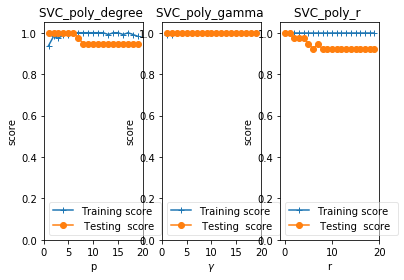

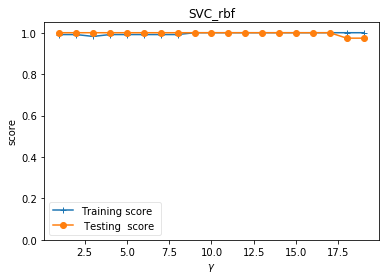

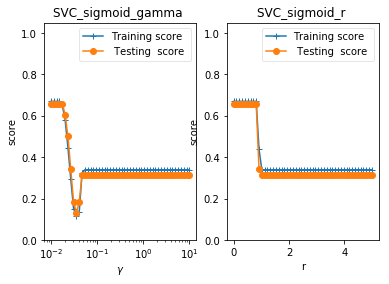

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets,linear_model,model_selection,svm

def load_data_classfication():
    iris=datasets.load_iris()
    X_train=iris.data
    y_train=iris.target
    return model_selection.train_test_split(X_train, y_train,test_size=0.25,
        random_state=0,stratify=y_train) 

def test_SVC_linear(*data):
    X_train,X_test,y_train,y_test=data
    cls=svm.SVC(kernel='linear')
    cls.fit(X_train,y_train)
    print('Coefficients:%s, intercept %s'%(cls.coef_,cls.intercept_))
    print('Score: %.2f' % cls.score(X_test, y_test))
    
def test_SVC_poly(*data):
    X_train,X_test,y_train,y_test=data
    fig=plt.figure()
    
    degrees=range(1,20)
    train_scores=[]
    test_scores=[]
    for degree in degrees:
        cls=svm.SVC(kernel='poly',degree=degree)
        cls.fit(X_train,y_train)
        train_scores.append(cls.score(X_train,y_train))
        test_scores.append(cls.score(X_test, y_test))
    ax=fig.add_subplot(1,3,1) 
    ax.plot(degrees,train_scores,label="Training score ",marker='+' )
    ax.plot(degrees,test_scores,label= " Testing  score ",marker='o' )
    ax.set_title( "SVC_poly_degree ")
    ax.set_xlabel("p")
    ax.set_ylabel("score")
    ax.set_ylim(0,1.05)
    ax.legend(loc="best",framealpha=0.5)

    gammas=range(1,20)
    train_scores=[]
    test_scores=[]
    for gamma in gammas:
        cls=svm.SVC(kernel='poly',gamma=gamma,degree=3)
        cls.fit(X_train,y_train)
        train_scores.append(cls.score(X_train,y_train))
        test_scores.append(cls.score(X_test, y_test))
    ax=fig.add_subplot(1,3,2)
    ax.plot(gammas,train_scores,label="Training score ",marker='+' )
    ax.plot(gammas,test_scores,label= " Testing  score ",marker='o' )
    ax.set_title( "SVC_poly_gamma ")
    ax.set_xlabel(r"$\gamma$")
    ax.set_ylabel("score")
    ax.set_ylim(0,1.05)
    ax.legend(loc="best",framealpha=0.5)
    
    rs=range(0,20)
    train_scores=[]
    test_scores=[]
    for r in rs:
        cls=svm.SVC(kernel='poly',gamma=10,degree=3,coef0=r)
        cls.fit(X_train,y_train)
        train_scores.append(cls.score(X_train,y_train))
        test_scores.append(cls.score(X_test, y_test))
    ax=fig.add_subplot(1,3,3)
    ax.plot(rs,train_scores,label="Training score ",marker='+' )
    ax.plot(rs,test_scores,label= " Testing  score ",marker='o' )
    ax.set_title( "SVC_poly_r ")
    ax.set_xlabel(r"r")
    ax.set_ylabel("score")
    ax.set_ylim(0,1.05)
    ax.legend(loc="best",framealpha=0.5)
    plt.show()
    
def test_SVC_rbf(*data):
    X_train,X_test,y_train,y_test=data
    gammas=range(1,20)
    train_scores=[]
    test_scores=[]
    for gamma in gammas:
        cls=svm.SVC(kernel='rbf',gamma=gamma)
        cls.fit(X_train,y_train)
        train_scores.append(cls.score(X_train,y_train))
        test_scores.append(cls.score(X_test, y_test))
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    ax.plot(gammas,train_scores,label="Training score ",marker='+' )
    ax.plot(gammas,test_scores,label= " Testing  score ",marker='o' )
    ax.set_title( "SVC_rbf")
    ax.set_xlabel(r"$\gamma$")
    ax.set_ylabel("score")
    ax.set_ylim(0,1.05)
    ax.legend(loc="best",framealpha=0.5)
    plt.show()
    
def test_SVC_sigmoid(*data):
    X_train,X_test,y_train,y_test=data
    fig=plt.figure()

    gammas=np.logspace(-2,1)
    train_scores=[]
    test_scores=[]

    for gamma in gammas:
        cls=svm.SVC(kernel='sigmoid',gamma=gamma,coef0=0)
        cls.fit(X_train,y_train)
        train_scores.append(cls.score(X_train,y_train))
        test_scores.append(cls.score(X_test, y_test))
    ax=fig.add_subplot(1,2,1)
    ax.plot(gammas,train_scores,label="Training score ",marker='+' )
    ax.plot(gammas,test_scores,label= " Testing  score ",marker='o' )
    ax.set_title( "SVC_sigmoid_gamma ")
    ax.set_xscale("log")
    ax.set_xlabel(r"$\gamma$")
    ax.set_ylabel("score")
    ax.set_ylim(0,1.05)
    ax.legend(loc="best",framealpha=0.5)
    
    rs=np.linspace(0,5)
    train_scores=[]
    test_scores=[]

    for r in rs:
        cls=svm.SVC(kernel='sigmoid',coef0=r,gamma=0.01)
        cls.fit(X_train,y_train)
        train_scores.append(cls.score(X_train,y_train))
        test_scores.append(cls.score(X_test, y_test))
    ax=fig.add_subplot(1,2,2)
    ax.plot(rs,train_scores,label="Training score ",marker='+' )
    ax.plot(rs,test_scores,label= " Testing  score ",marker='o' )
    ax.set_title( "SVC_sigmoid_r ")
    ax.set_xlabel(r"r")
    ax.set_ylabel("score")
    ax.set_ylim(0,1.05)
    ax.legend(loc="best",framealpha=0.5)
    plt.show()
    
if __name__ == "__main__":
    X_train,X_test,y_train,y_test=load_data_classfication() 
    test_SVC_linear(X_train,X_test,y_train,y_test) 
    test_SVC_poly(X_train,X_test,y_train,y_test) 
    test_SVC_rbf(X_train,X_test,y_train,y_test) 
    test_SVC_sigmoid(X_train,X_test,y_train,y_test) 